# EDA for Haberman Dataset

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')


In [2]:
#Reading the dataset
haberman_data = pd.read_csv(r'haberman.csv')

In [3]:
haberman_data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Information/ meaning of all the attributes/ columns of the dataset

* This Information has been gathered from Kaggle's Haberman's Survival dataset page https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1 

* a) Age of patient at time of operation (numerical)
* b) Patient's year of operation (year - 1900, numerical)
* c) Number of positive axillary nodes detected (numerical)
* d) Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

* From this information we can conclude that 'status' is our output label or class variable

High level statistics of the dataset:

In [4]:
#Number of points
haberman_data.shape


(306, 4)

* Here we can see that we have total 306 data points and 4 columns including the output label or class variable

In [5]:
#Numer of features
print(haberman_data.columns)
print("Total Number of columns in the Haberman dataset are: {0}".format(len(haberman_data.columns)))


Index(['age', 'year', 'nodes', 'status'], dtype='object')
Total Number of columns in the Haberman dataset are: 4


* Since 'status' is our class label, we have 3 feature columns i.e. 'age', 'year' and 'nodes'

In [6]:
#Number of classes
print("Number of classes in Haberman dataset are: {0}".format(haberman_data.status.nunique()))


Number of classes in Haberman dataset are: 2


* Since we have 2 classes in our Haberman dataset, we can call it as a binary classification problem

In [7]:
#Data-points per class
print("Data-points per class in Haberman dataset are:\n{0}".format(haberman_data.status.value_counts()))


Data-points per class in Haberman dataset are:
1    225
2     81
Name: status, dtype: int64


In [8]:
class_label_value_counts = haberman_data.status.value_counts()
class1_data = class_label_value_counts[1]
class2_data = class_label_value_counts[2]
print("Class 1 has {0} % and Class 2 has {1} % of total data-points".format((class1_data/(class1_data+class2_data)*100),(class2_data/(class1_data+class2_data)*100)))


Class 1 has 73.52941176470588 % and Class 2 has 26.47058823529412 % of total data-points


* Out of the total 306 data-points, Class 1 has 225 data-points and Class 2 has 81 data-points.
* Or, we can say Class 1 has 73.5% and Class 2 has 26.4% of total data-points
* Therefore, we can say that classes are imbalanced since one class has much more data-points than other 

In [9]:
haberman_data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Objective

* The objective or the problem statement here is to successfully build a Machine Learning Classification model that correctly predicts the 'status' of the patient based on attributes like 'age', 'year' and 'nodes'.

* But this notebook deals only with Exploratory Data Analysis part of the problem where we use various techniques to find relationship between features and class variable and behaviour of the data.

# Univariate Analysis

** PDF's for each feature **

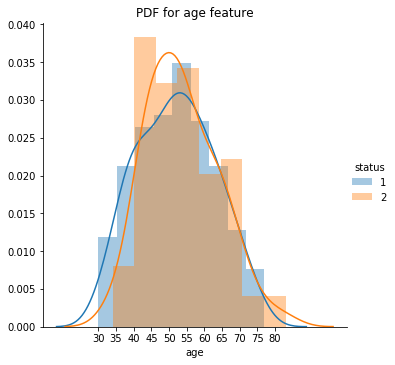

In [10]:
#PDF for 'age' feature

sns.FacetGrid(haberman_data, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()

plt.xticks(np.arange(min(haberman_data['age']), max(haberman_data['age'])+1, 5.0))
plt.title("PDF for age feature")
plt.show()

*Observation*

* Since PDF for 'age' feature with respect to class variable 'status' is highly overlapped, we cannot simply separate the two classes based on 'age' feature alone.
* Also, in our dataset people between the age 40-55 are more who died within 5 years of surgery than people who survived. Hence we can say 40-55 is the critical age group for surgery for breast cancer

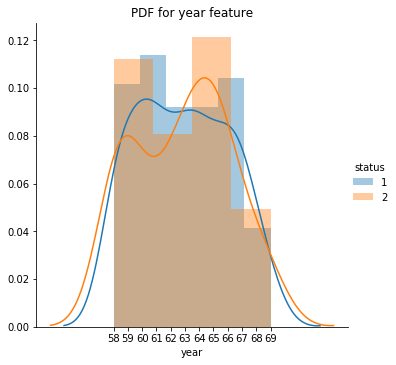

In [11]:
#PDF for 'year' feature

sns.FacetGrid(haberman_data, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()

plt.xticks(np.arange(min(haberman_data['year']), max(haberman_data['year'])+1, 1.0))
plt.title("PDF for year feature")
plt.show()

*Observation*

* Since PDF for 'year' feature with respect to class variable 'status' is highly overlapped, we cannot simply separate the two classes based on 'year' feature alone.
* Also, in our dataset among the people who got operated roughly between the years 1959-1962, people who survived 5 years or more after the surgery are little more than the ones who died within 5 years of surgery.

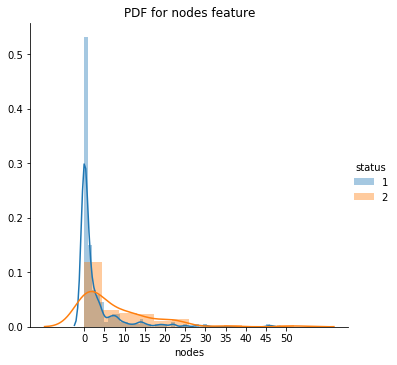

In [12]:
#PDF for 'nodes' feature

sns.FacetGrid(haberman_data, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()

plt.xticks(np.arange(min(haberman_data['nodes']), max(haberman_data['nodes'])+1, 5.0))
plt.title("PDF for nodes feature")
plt.show()

*Observation*

* Since PDF for 'nodes' feature with respect to class variable 'status' is highly overlapped, we cannot simply separate the two classes based on 'nodes' feature alone.
* Also, in our dataset people with 1 positive axillary nodes detected have a much higher probabality of surviving 5 year or more after the surgery.

** CDF's for each feature **

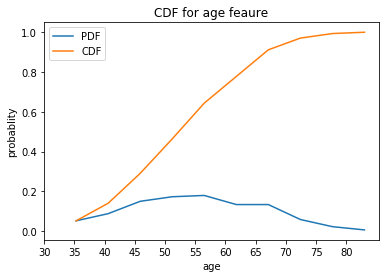

In [13]:
#CDF for 'age' feature

counts, bin_edges = np.histogram(haberman_data['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")

plt.xticks(np.arange(min(haberman_data['age']), max(haberman_data['age'])+1, 5.0))
plt.xlabel("age")
plt.ylabel("probablity")
plt.legend()
plt.title("CDF for age feaure")
plt.show()

*Observation*

* Around 60% of the people in our dataset have age less than equal to 55
* Roughly around 80% of the people in our dataset have age less than equal to 62.5

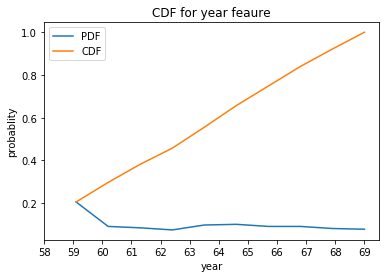

In [14]:
#CDF for 'year' feature

counts, bin_edges = np.histogram(haberman_data['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")

plt.xticks(np.arange(min(haberman_data['year']), max(haberman_data['year'])+1, 1.0))
plt.xlabel("year")
plt.ylabel("probablity")
plt.legend()
plt.title("CDF for year feaure")
plt.show()

*Observation*

* Straight line denotes that almost every year same number of people got operated for breast cancer

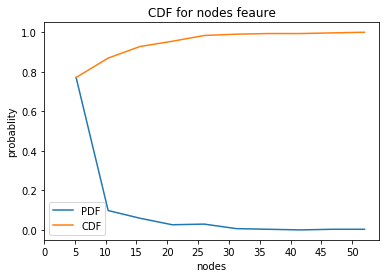

In [15]:
#CDF for 'nodes' feature

counts, bin_edges = np.histogram(haberman_data['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = "PDF")
plt.plot(bin_edges[1:], cdf, label = "CDF")

plt.xticks(np.arange(min(haberman_data['nodes']), max(haberman_data['nodes'])+1, 5.0))
plt.xlabel("nodes")
plt.ylabel("probablity")
plt.legend()
plt.title("CDF for nodes feaure")
plt.show()

*Observation*

* Roughly around 80% of the people in our dataset have less than equal to 5 positive axillary nodes detected. 

**Boxplot and Violin Plots for each feature**

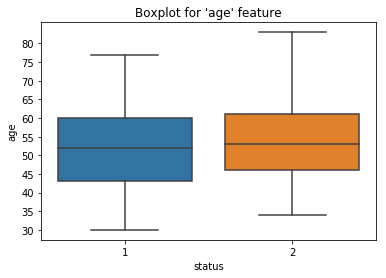

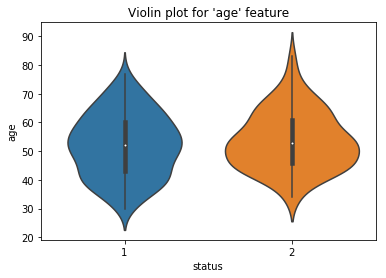

In [16]:
#Boxplot for 'age' feature

sns.boxplot(x='status',y='age', data=haberman_data)

plt.yticks(np.arange(min(haberman_data['age']), max(haberman_data['age'])+1, 5.0))
plt.title("Boxplot for 'age' feature")
plt.show()


#Violin plot for 'age' feature
sns.violinplot(x="status", y="age", data=haberman_data, size=8)
plt.title("Violin plot for 'age' feature")
plt.show()

*Observation*

* Age of the people in our dataset that have status 1 (i.e. survived 5 years or more after surgery) have Inter Quartile Range of age (i.e. between 25th to 75 percentile) as roughly around 43-60 years.
* Age of the people in our dataset that have status 2 (i.e. died within 5 years of surgery) have Inter Quartile Range of age (i.e. between 25th to 75 percentile) as roughly around 46-61 years.
* Hence we can see that on the basis of age we cannot tell that whether a person will survive or not for 5 years or more after the surgery.

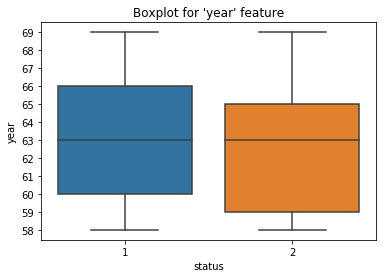

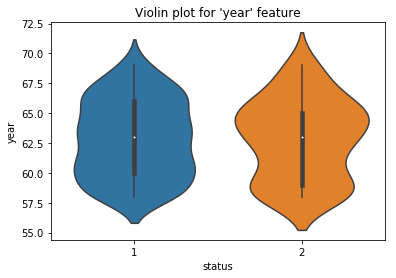

In [17]:
#Boxplot for 'year' feature

sns.boxplot(x='status',y='year', data=haberman_data)

plt.yticks(np.arange(min(haberman_data['year']), max(haberman_data['year'])+1, 1.0))
plt.title("Boxplot for 'year' feature")
plt.show()

#Violin plot for 'age' feature
sns.violinplot(x="status", y="year", data=haberman_data, size=8)
plt.title("Violin plot for 'year' feature")
plt.show()

*Observation*

* Year of opertaion for the people in our dataset that have status 1 (i.e. survived 5 years or more after surgery) have Inter Quartile Range of year (i.e. between 25th to 75 percentile) as roughly around 1960-1966 which means almost 50% of the people who lie in class of status 1 got operated between 1960-1966 .
* Year of opertaion for the people in our dataset that have status 2 (i.e. survived 5 years or more after surgery) have Inter Quartile Range of year (i.e. between 25th to 75 percentile) as roughly around 1959-1965 which means almost 50% of the people who lie in class of status 2 got operated between 1960-1966.
* Hence we can see that on the basis of year of operation we cannot tell that whether a person will survive or not for 5 years or more after the surgery.

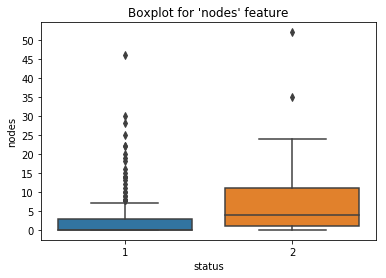

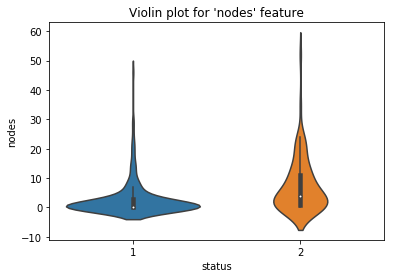

In [18]:
#Boxplot for 'nodes' feature

sns.boxplot(x='status',y='nodes', data=haberman_data)

plt.yticks(np.arange(min(haberman_data['nodes']), max(haberman_data['nodes'])+1, 5.0))
plt.title("Boxplot for 'nodes' feature")
plt.show()

#Violin plot for 'age' feature
sns.violinplot(x="status", y="nodes", data=haberman_data, size=8)
plt.title("Violin plot for 'nodes' feature")
plt.show()

*Observation*

* People who survived 5 years or more after the surgery(status = 1), more than 50% of the values of 'nodes' lie roughly between 0 to 4
* People who died within 5 years of the surgery(status = 2), roughly 50% of the values of 'nodes' lie roughly between 1 to 11
* Here, we see that we cannot clearly separate the two classes based on nodes alone but people with leasser number of node i.e. between 0-4 have a higher tendancy of surviving 5 years or more after surgery. 

# Bivariate Analysis

**Scatter Plots**

* Since we have 3 feature so we'll have total 3C2 = 3 scatter plots

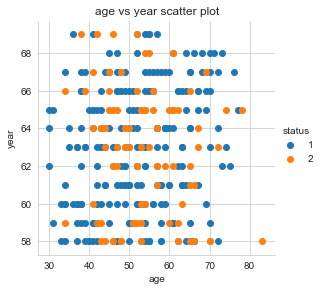

In [19]:
#Scatter plot between 'age' and 'year' feature

sns.set_style("whitegrid")
sns.FacetGrid(haberman_data, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend()
plt.title("age vs year scatter plot")
plt.show()

*Observation*

* We can see from the age vs year scatter plot that there is no linear boundary that can separate our two classes i.e. 1 and 2 from each other as their is considerable overlap.
* Therefore, it will be hard to separate our two classes based on age and year together.

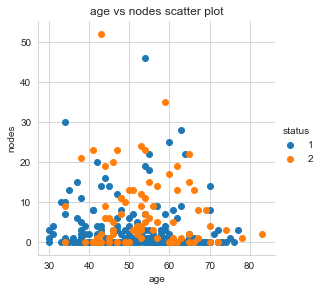

In [20]:
#Scatter plot between 'age' and 'nodes' feature

sns.set_style("whitegrid")
sns.FacetGrid(haberman_data, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.title("age vs nodes scatter plot")
plt.show()

*Observation*

* We can see from the age vs nodes scatter plot that there is no linear boundary that can separate our two classes i.e. 1 and 2 from each other as their is considerable overlap.
* Therefore, it will be hard to separate our two classes based on age and nodes together.

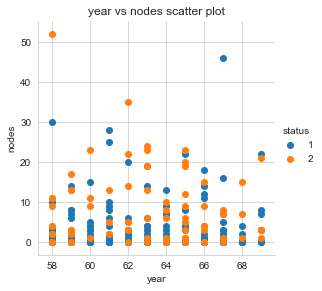

In [21]:
#Scatter plot between 'year' and 'nodes' feature

sns.set_style("whitegrid")
sns.FacetGrid(haberman_data, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend()
plt.title("year vs nodes scatter plot")
plt.show()

*Observation*

* We can see from the year vs nodes scatter plot that there is no linear boundary that can separate our two classes i.e. 1 and 2 from each other as their is considerable overlap.
* Therefore, it will be hard to separate our two classes based on year and nodes together.

**Pair Plots**

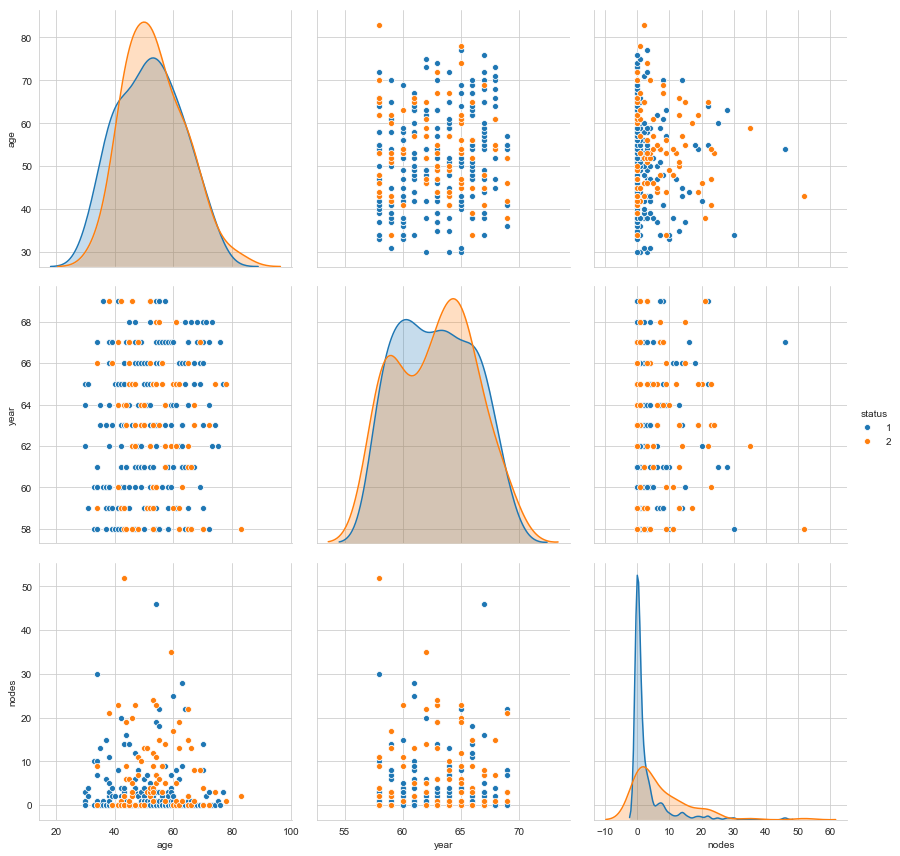

In [22]:
#Pair plots between all the features taken 2 at a time

sns.set_style("whitegrid")
sns.pairplot(haberman_data, hue="status", vars = ['age','year','nodes'] , size=4)
plt.show()

*Observation*

* From the pair plots, where all the 3 features are plotted with each other in every possible combination, we can conclude the fact that no two features together would be sufficient for us to clearly seprate our two output classes.
* Hence we can say that our data with respect to output variable(i.e. status) is not linearly separable in 2D.
* We can still go for some machine learning algorithms, but error rate would be considerably high.
* We can explore the options of separating the two classes in 3D by a plane.